In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_data(file_name: str):
    with open(file_name) as f:
        columns = f.readline().split()
        text = f.read()

    data = [
        row.split(" ")
        for row in text.split("\n")
    ]
    for i, row in enumerate(data):
        for j in range(4):
            row[j] = int(row[j])
        row[4] = float(row[4])
    return pd.DataFrame(data, columns=columns)

In [3]:
row_data = get_data("column_data.txt")
row_data

,processes,lsize,msize,rsize,time
0,1,8,8,8,0.000027
1,2,8,8,8,0.000105
2,3,8,8,8,0.000154
3,4,8,8,8,0.000047
4,5,8,8,8,0.000187
...,...,...,...,...,...
507,4,1024,1024,1024,3.071078
508,5,1024,1024,1024,2.929540
509,6,1024,1024,1024,3.223147
510,7,1024,1024,1024,3.027048


In [4]:
x_axis = range(1, 9)
y_axis = row_data[(row_data.lsize == 1024) & (row_data.msize == 1024) & (row_data.rsize == 1024)].time
y_axis

504    7.170435
505    4.381624
506    3.516024
507    3.071078
508    2.929540
509    3.223147
510    3.027048
511    3.457495
Name: time, dtype: float64

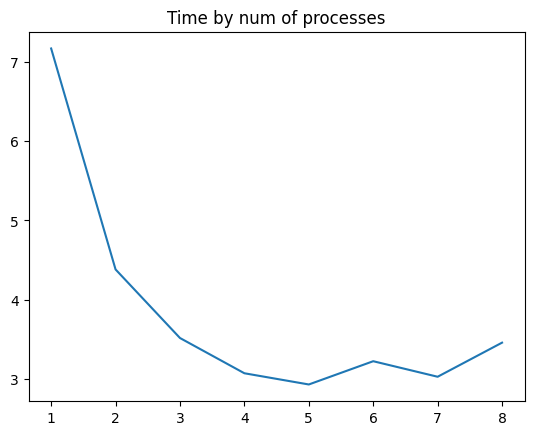

In [5]:
plt.plot(x_axis, y_axis)
plt.title('Time by num of processes')
plt.show()

In [6]:
equal_size_data = row_data[(row_data.lsize == row_data.msize) & (row_data.msize == row_data.rsize)]
equal_size_data[equal_size_data.processes == 1]

,processes,lsize,msize,rsize,time
0,1,8,8,8,0.000027
168,1,64,64,64,0.001606
336,1,256,256,256,0.123352
504,1,1024,1024,1024,7.170435


In [7]:
equal_size_data[equal_size_data.processes == 5]

,processes,lsize,msize,rsize,time
4,5,8,8,8,0.000187
172,5,64,64,64,0.001100
340,5,256,256,256,0.056327
508,5,1024,1024,1024,2.929540


In [21]:
a = equal_size_data[equal_size_data.processes == 1].time.divide(equal_size_data[equal_size_data.processes == 5].time.values)
a

0      0.144385
168    1.460000
336    2.189927
504    2.447632
Name: time, dtype: float64

In [22]:
a / 5

0      0.028877
168    0.292000
336    0.437985
504    0.489526
Name: time, dtype: float64

In [34]:
time_by_num_proc = equal_size_data[(row_data.lsize == 1024) & (row_data.msize == 1024) & (row_data.rsize == 1024)].time
time_by_num_proc

C:\Users\dimit\AppData\Local\Temp\ipykernel_15100\2916614139.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  time_by_num_proc = equal_size_data[(row_data.lsize == 1024) & (row_data.msize == 1024) & (row_data.rsize == 1024)].time


504    7.170435
505    4.381624
506    3.516024
507    3.071078
508    2.929540
509    3.223147
510    3.027048
511    3.457495
Name: time, dtype: float64

In [37]:
a = (time_by_num_proc.iloc[0] / time_by_num_proc).reset_index(drop=True)
a

0    1.000000
1    1.636479
2    2.039359
3    2.334827
4    2.447632
5    2.224669
6    2.368788
7    2.073882
Name: time, dtype: float64

In [38]:
a / (a.index + 1)

0    1.000000
1    0.818239
2    0.679786
3    0.583707
4    0.489526
5    0.370778
6    0.338398
7    0.259235
dtype: float64

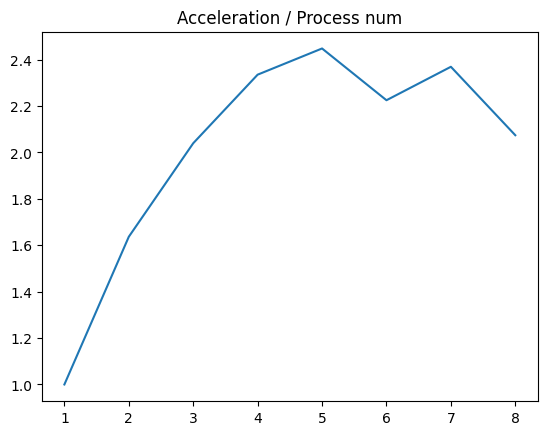

In [39]:
plt.plot(range(1, 9), a)
plt.title('Acceleration / Process num')
plt.show()

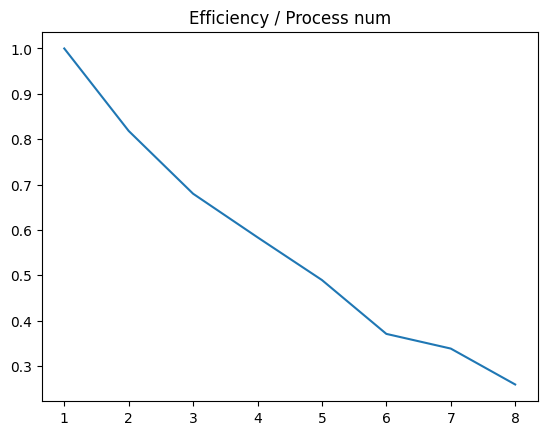

In [40]:
plt.plot(range(1, 9), a / (a.index + 1))
plt.title('Efficiency / Process num')
plt.show()